###### Import Modules form Pandas and numpy

In [1]:
import pandas as pd
import numpy as np

###### Importing Shooting file as data frame

In [2]:
org_data = pd.read_csv("shootings.csv")
org_data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


###### Deleting the id column from the dataframe, since it has no significant role id the data

In [3]:
f_data = org_data.drop(["id"], axis=1)

###### Creating Function to check missing value in the dataframe

In [4]:
def missing_data(df):
    mis_val =df.isnull().sum()
    mis_val_percent = (100 * mis_val)/len(df)
    
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)
    rename_table = mis_val_table.rename(columns = {0 : "Missing Value", 1: "% of total values"})
    rename_table = rename_table[rename_table.iloc[:,1] != 0].sort_values("% of total values", ascending= False).round(1)
    
    print("Your selectect dataframe has " + str(df.shape[1]) + " Columns. \n "
         " There are " + str(rename_table.shape[0]) + " Columns that have missing values.")
    return rename_table

###### calling Missing function to check Dataframe

In [5]:
missing_data(f_data)

Your selectect dataframe has 14 Columns. 
  There are 0 Columns that have missing values.


,Missing Value,% of total values


###### Checking each coolumn for Inproper or null value such as -1, NAN, 0 

In [6]:
f_data["name"].value_counts(sort=True, ascending=True)
f_data["date"].value_counts(sort=True, ascending=True)
f_data["manner_of_death"].value_counts(sort=True, ascending=True)
f_data["armed"].value_counts(sort=True, ascending=True)
f_data["age"].value_counts(sort=True, ascending=True)
f_data["gender"].value_counts(sort=True, ascending=True)
f_data["race"].value_counts(sort=True, ascending=True)
f_data["city"].value_counts(sort=True, ascending=True)
f_data["state"].value_counts(sort=True, ascending=True)
f_data["signs_of_mental_illness"].value_counts(sort=True, ascending=True)
f_data["flee"].value_counts(sort=True, ascending=True)
f_data["body_camera"].value_counts(sort=True, ascending=True)
f_data["arms_category"].value_counts(sort=True, ascending=True)

Hand tools                  1
Explosives                  4
Electrical devices         24
Piercing objects           29
Multiple                   54
Vehicles                  121
Blunt instruments         122
Other unusual objects     192
Unarmed                   348
Unknown                   418
Sharp objects             818
Guns                     2764
Name: arms_category, dtype: int64

###### Importing datetime modules to convert into string into date and spliting date filed to year, month and day
Spliting age into age range ie: below 18, 18-30,31-40,41-55,56-65 and 65 above.

Adding new cloumn in the f_data, ie : Year, month, day and age range 
    

In [7]:
import datetime
f_data["date"] =pd.to_datetime(f_data["date"]) 
f_data["year"] = pd.to_datetime(f_data["date"]).dt.year
f_data["month"] = pd.to_datetime(f_data["date"]).dt.month
# f_data["month_name"] =f_data["date"].dt.strftime("%B")
# f_data["month_num"] = f_data["date"].dt.strftime("%m")
# f_data["weekday"] = f_data["date"].dt.strftime("%A")
f_data["day"] = f_data["date"].dt.strftime("%d").astype(int)
# f_data['date_categ']=np.where(f_data['day_num']<16,"First Half","Second Half")
# f_data['date_mon']=f_data.date.dt.to_period("M")

bins= [-1,18,30,40,55,65,110]
labels = ['Under 18','18-30','31-40','41-55','56-65', 'Above 65']
f_data['age_range'] = pd.cut(f_data['age'], bins=bins, labels=labels, right=False)

f_data

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month,day,age_range
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015,1,2,41-55
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015,1,2,41-55
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015,1,3,18-30
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015,1,4,31-40
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015,1,4,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices,2020,6,12,18-30
4891,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns,2020,6,12,18-30
4892,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed,2020,6,13,18-30
4893,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns,2020,6,13,18-30


## Analysing Data date wise

###### Importing matplotlib and seaborn moduls for graphical visulization purpose
modulea detail : https://matplotlib.org/                https://seaborn.pydata.org/

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Total no of death year wise
2. Total no of death year and month wise

In [9]:
df = f_data.groupby("year")["armed"].count().reset_index()
df = df.rename(columns={"armed": "Total"})
year_wise_death = df.sort_values("year", ascending = False).head(20)
year_wise_death

,year,Total
5,2020,374
4,2019,858
3,2018,888
2,2017,906
1,2016,904
0,2015,965


1. Adding month name column in the data frame
2. Merging year and month name and adding as new column in dataframe

In [10]:
date_wise_data = f_data.copy()
date_wise_data["month_name"] =date_wise_data["date"].dt.strftime("%b") 
date_wise_data['year_month']=date_wise_data.date.dt.to_period("M")
year_month_data = date_wise_data.groupby("year_month")["armed"].count().reset_index()
year_month_data = year_month_data.rename(columns={"armed": "Total"})
year_month_data = year_month_data.sort_values("Total", ascending = False).head(20)
year_month_data

,year_month,Total
59,2019-12,100
6,2015-07,100
38,2018-03,99
25,2017-02,97
36,2018-01,96
7,2015-08,91
24,2017-01,91
30,2017-07,91
2,2015-03,91
14,2016-03,90


In [11]:
monthwise_data = date_wise_data.groupby("month_name")["armed"].count().reset_index()
monthwise_data = monthwise_data.rename(columns={"armed": "Total"})
monthwise_data = monthwise_data.sort_values("Total", ascending = False)
monthwise_data

,month_name,Total
4,Jan,505
7,Mar,503
3,Feb,462
0,Apr,430
8,May,418
5,Jul,413
6,Jun,399
1,Aug,371
10,Oct,367
9,Nov,354


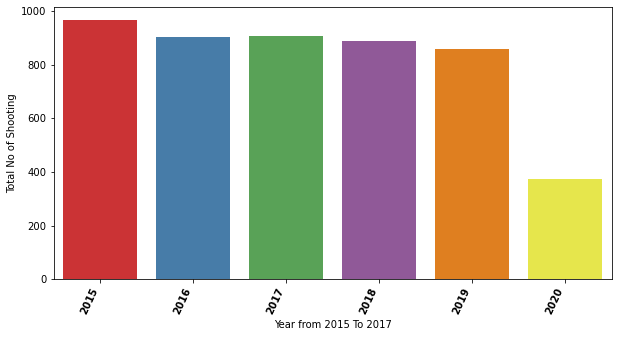

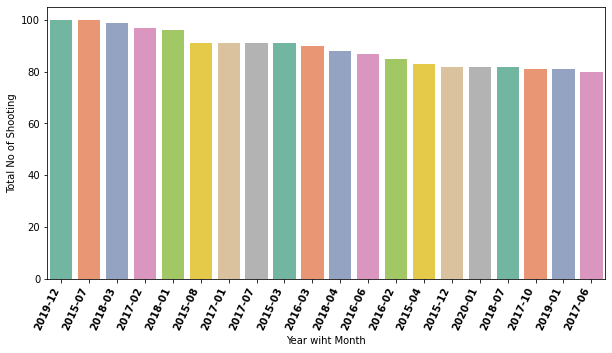

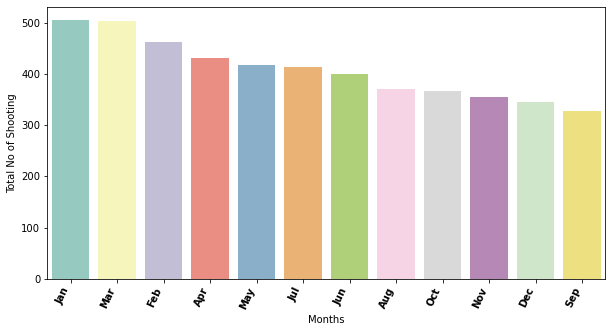

In [12]:
plt.figure(figsize = (10,5))
chart = sns.barplot( data = year_wise_death, x = "year", y = "Total", palette = "Set1" )
chart.set(xlabel="Year from 2015 To 2017", ylabel = "Total No of Shooting")
chart = chart.set_xticklabels( chart.get_xticklabels(), rotation=65, horizontalalignment = "right", fontweight = "bold")

plt.figure(figsize = (10,5))
chart = sns.barplot( data = year_month_data, x = "year_month", y = "Total", palette = "Set2" )
chart.set(xlabel="Year wiht Month", ylabel = "Total No of Shooting")
chart = chart.set_xticklabels( chart.get_xticklabels(), rotation=65, horizontalalignment = "right", fontweight = "bold")

plt.figure(figsize = (10,5))
chart = sns.barplot( data = monthwise_data, x = "month_name", y = "Total", palette = "Set3" )
chart.set(xlabel="Months", ylabel = "Total No of Shooting")
chart = chart.set_xticklabels( chart.get_xticklabels(), rotation=65, horizontalalignment = "right", fontweight = "bold")


Findings Of Death Datewise :

## No of Death Race wise

1. Total no of death Race wise 
2. Total no of death with gender Race

In [40]:
df_race_wise = f_data.groupby(["race","gender"]).size().unstack(level=0)
df_race_wise


race,Asian,Black,Hispanic,Native,Other,White
gender,,,,,,
F,4,47,26,5,4,136
M,89,1251,876,73,44,2340


1. Upload Census data
2. Data cleaning
3. Merge census data wiht df_race_wise dataframe

In [14]:
census_data = pd.read_csv("census_data.csv")
# list(census_data.columns)

###### Select only required colums from the file

In [15]:
w_census_data = census_data.copy()
w_census_data = census_data[["State","County","TotalPop","Men","Women","Hispanic","White","Black","Native","Asian","Pacific","Poverty","Unemployment"]]
w_census_data = w_census_data.rename(columns = {"State": "state","County" : "county","TotalPop" : "total_pop","Men" : "total_men","Women" : "total_women","Hispanic" : "total_Hispanic","White" : "total_White","Black" : "total_black","Native" : "total_native","Asian" : "total_Asian","Pacific": "total_pacific","Poverty" : "total_poverty","Unemployment" : "total_Uneployment"})
missing_data(w_census_data)


Your selectect dataframe has 13 Columns. 
  There are 8 Columns that have missing values.


,Missing Value,% of total values
total_poverty,842,1.1
total_Uneployment,810,1.1
total_Hispanic,696,0.9
total_White,696,0.9
total_black,696,0.9
total_native,696,0.9
total_Asian,696,0.9
total_pacific,696,0.9


1. Replaced int Nan value to 0.0

In [16]:
w_census_data.sort_values(by='total_Uneployment', ascending=True)
w_census_data = w_census_data.fillna(0.0)
#w_census_data

In [17]:
missing_data(w_census_data)

Your selectect dataframe has 13 Columns. 
  There are 0 Columns that have missing values.


,Missing Value,% of total values


Grouping Census data by state

In [18]:
state_census_data = w_census_data.groupby("state", as_index=False).sum()
#state_census_data

Adding State code in Census Data for merging data with shooting data

In [19]:
state_code = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [20]:
state_census_data['state'] = state_census_data['state'].map(state_code)
state_census_data.head(5)

,state,total_pop,total_men,total_women,total_Hispanic,total_White,total_black,total_native,total_Asian,total_pacific,total_poverty,total_Uneployment
0,AL,4850771,2350806,2499965,4524.0,72091.3,37170.5,531.6,1262.6,33.8,23975.4,10165.6
1,AK,738565,386319,352246,1036.2,9896.8,446.2,2837.5,938.1,182.4,1844.4,1435.7
2,AZ,6809946,3385055,3424891,45584.9,85641.3,5855.7,6683.3,4505.7,261.0,26558.5,11511.6
3,AR,2977944,1461651,1516293,4418.9,48141.6,13162.0,367.4,818.6,103.2,13387.4,4822.2
4,CA,38982847,19366579,19616268,302436.7,315375.1,44892.6,3313.3,107156.8,2759.2,123077.0,62920.2


Total Polpulation in USA

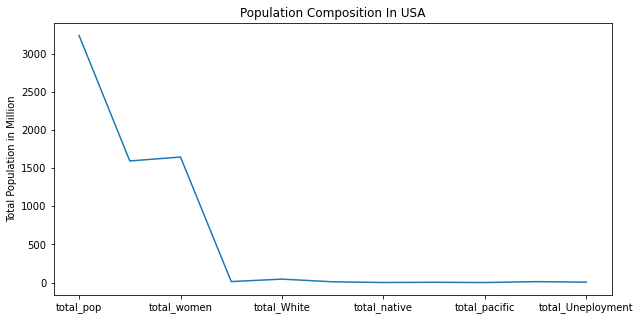

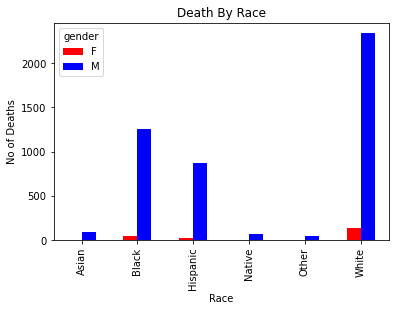

In [21]:
plt.figure(figsize = (10,5))
state_census_data.sum().div(100000).round(2).plot()
plt.title("Population Composition In USA")
plt.ylabel("Composition")
plt.ylabel("Total Population in Million")
df_race_wise.plot(kind="bar",color =["r","b"])
plt.title("Death By Race")
plt.xlabel("Race")
plt.ylabel("No of Deaths")
plt.show()

Merging shooting and Census data

In [22]:
state_shooting_data = f_data.groupby(["state","race"]).size().unstack()
state_shooting_data = state_shooting_data.fillna(0.0)

# merged_data = state_shooting_data.join(state_census_data, on="state", how = "inner")
merged_data = pd.merge(state_shooting_data,state_census_data, on = "state")
merged_data = merged_data.drop(["Other","total_men", "total_women", "total_pacific","total_poverty","total_Uneployment" ], axis = 1)

In [23]:
merged_data.head(5)

,state,Asian,Black,Hispanic,Native,White,total_pop,total_Hispanic,total_White,total_black,total_native,total_Asian
0,AK,2.0,3.0,0.0,9.0,22.0,738565,1036.2,9896.8,446.2,2837.5,938.1
1,AL,0.0,31.0,1.0,0.0,63.0,4850771,4524.0,72091.3,37170.5,531.6,1262.6
2,AR,1.0,26.0,0.0,0.0,46.0,2977944,4418.9,48141.6,13162.0,367.4,818.6
3,AZ,0.0,17.0,83.0,13.0,109.0,6809946,45584.9,85641.3,5855.7,6683.3,4505.7
4,CA,29.0,122.0,316.0,4.0,221.0,38982847,302436.7,315375.1,44892.6,3313.3,107156.8


Percentage of death Racewise

In [43]:
merged_data["% Asian"] = (merged_data["Asian"]/merged_data["total_Asian"]) * 100
merged_data["% Black"] = (merged_data["Black"]/merged_data["total_black"]) * 100
merged_data["% Hispanic"] = (merged_data["Hispanic"]/merged_data["total_Hispanic"]) * 100
merged_data["% Native"] = (merged_data["Native"]/merged_data["total_native"]) * 100
merged_data["% White"] = (merged_data["White"]/merged_data["total_White"]) * 100
merged_data.head(5)

,state,Asian,Black,Hispanic,Native,White,total_pop,total_Hispanic,total_White,total_black,total_native,total_Asian,% Asian,% Black,% Hispanic,% Native,% White
0,AK,2.0,3.0,0.0,9.0,22.0,738565,1036.2,9896.8,446.2,2837.5,938.1,0.213197,0.672344,0.000000,0.317181,0.222294
1,AL,0.0,31.0,1.0,0.0,63.0,4850771,4524.0,72091.3,37170.5,531.6,1262.6,0.000000,0.083399,0.022104,0.000000,0.087389
2,AR,1.0,26.0,0.0,0.0,46.0,2977944,4418.9,48141.6,13162.0,367.4,818.6,0.122160,0.197538,0.000000,0.000000,0.095551
3,AZ,0.0,17.0,83.0,13.0,109.0,6809946,45584.9,85641.3,5855.7,6683.3,4505.7,0.000000,0.290315,0.182078,0.194515,0.127275
4,CA,29.0,122.0,316.0,4.0,221.0,38982847,302436.7,315375.1,44892.6,3313.3,107156.8,0.027063,0.271760,0.104485,0.120726,0.070075


No of death in Races state wise

In [44]:
per_race_data = merged_data[["% Asian","% Black","% Hispanic","% Native", "% White"]].sum().round(2).reset_index()
per_race_data = per_race_data.rename(columns = {"index": "Race", 0 : "Total %"})
per_race_data = per_race_data.set_index('Race')
per_race_data

,Total %
Race,
% Asian,2.36
% Black,9.67
% Hispanic,2.89
% Native,7.58
% White,3.28


Text(0, 0.5, ' % of Deaths')

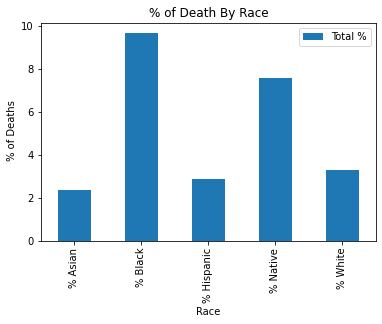

In [45]:
per_race_data.plot(kind = "bar")
plt.title("% of Death By Race")
plt.xlabel("Race")
plt.ylabel(" % of Deaths")

In [46]:
monthly_df = f_data["date"].groupby(f_data.date.dt.to_period("M")).agg("count").to_frame(name="count").reset_index()
#monthly_df

## Age wise data

In [47]:
df_age_wise = f_data.groupby(["age_range","year"]).size().unstack(level = 1)
df_age_wise
# for key, value in df_age_wise:
#     print(key)
#     print(value)

year,2015,2016,2017,2018,2019,2020
age_range,,,,,,
Under 18,18,16,28,15,13,7
18-30,330,288,289,277,253,108
31-40,278,303,274,274,286,134
41-55,244,208,225,219,210,89
56-65,75,67,61,74,74,26
Above 65,20,22,29,29,22,10


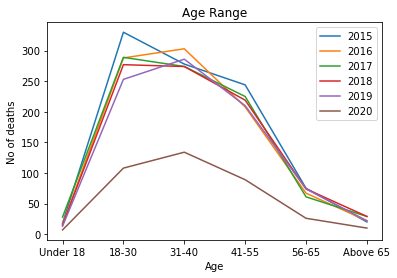

In [48]:
plt.plot(df_age_wise)
plt.title("Age Range")
plt.xlabel("Age")
plt.ylabel("No of deaths")
plt.legend(["2015","2016","2017","2018","2019","2020"])

## Cities wise Data

In [49]:
df_age_wise = f_data.groupby(["year","age_range","race"]).size().unstack(level = 1)
df_age_wise


age_range      Under 18  18-30  31-40  41-55  56-65  Above 65
year race                                                    
2015 Asian            0      3      7      2      2         0
     Black            5    124     77     39     10         3
     Hispanic         3     71     54     37      6         1
     Native           0      4      4      1      0         0
     Other            0      7      3      5      0         0
     White           10    121    133    160     57        16
2016 Asian            1      4      3      6      1         0
     Black            6    107     80     31      9         1
     Hispanic         4     61     63     25      3         4
     Native           0      7      6      3      0         0
     Other            0      6      3      1      1         0
     White            5    103    148    142     53        17
2017 Asian            0      7      5      3      1         0
     Black           12     94     63     44      8         3
     Hispanic         7     72     59     31      7         3
     Native           1     10      9      2      0         0
     Other            0      4      1      1      0         0
     White            8    102    137    144     45        23
2018 Asian            0      5      8      5      3         0
     Black            6     88     77     46      8         4
     Hispanic         3     60     52     38     10         2
     Native           0      5      7      3      0         0
     Other            0      1      3      0      0         0
     White            6    118    127    127     53        23
2019 Asian            1      3      8      7      0         0
     Black            4    100     88     42     10         6
     Hispanic         6     49     67     35      6         0
     Native           0      5      5      2      1         0
     Other            0      2      3      3      1         0
     White            2     94    115    121     56        16
2020 Asian            1      2      3      1      1         0
     Black            5     45     28     19      5         1
     Hispanic         0     23     27     12      1         0
     Native           0      2      0      1      0         0
     Other            0      2      1      0      0         0
     White            1     34     75     56     19         9

Text(0, 0.5, 'Year')

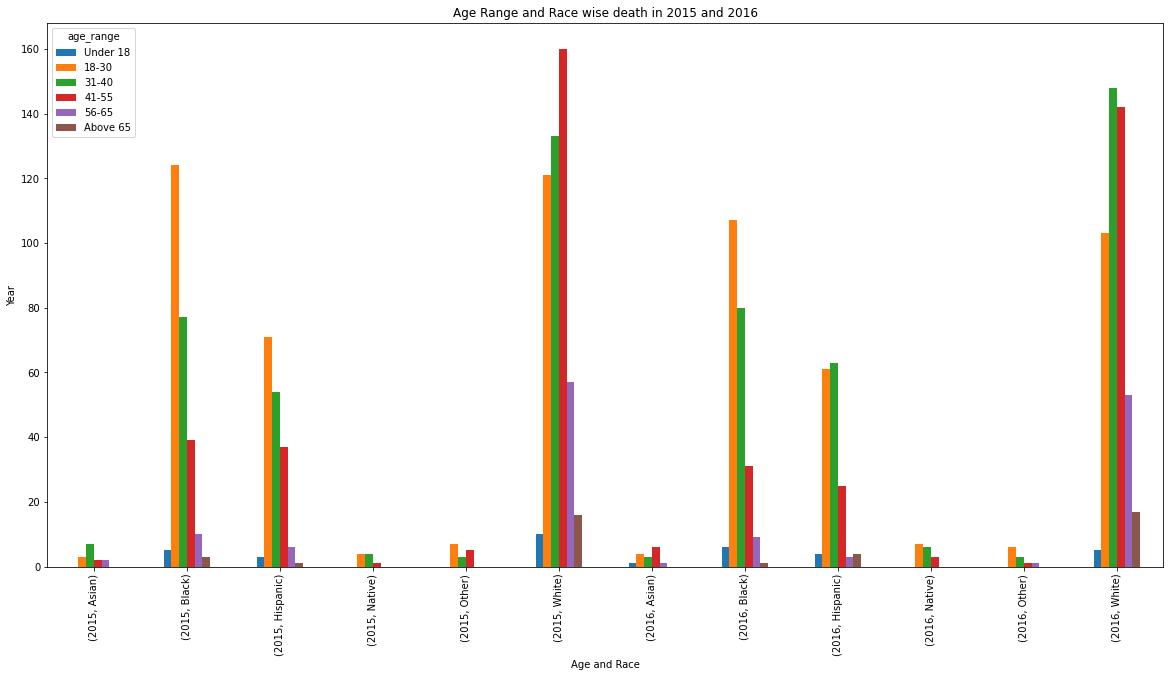

In [50]:
filter_df = df_age_wise.loc[2015:2016,:]
filter_df.plot(kind="bar",figsize=(20,10))
plt.title("Age Range and Race wise death in 2015 and 2016")
plt.xlabel("Age and Race")
plt.ylabel("Year")
#plt.legend(["Asian","Black"])                          

In [51]:
df_age_wise.describe()

age_range,Under 18,18-30,31-40,41-55,56-65,Above 65
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2.694444,42.916667,43.027778,33.194444,10.472222,3.666667
std,3.267323,44.596845,46.659549,46.400012,17.828526,6.671903
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,3.750000,2.000000,0.000000,0.000000
50%,1.000000,16.500000,18.000000,9.500000,2.500000,0.000000
75%,5.000000,89.500000,75.500000,39.750000,9.250000,3.250000
max,12.000000,124.000000,148.000000,160.000000,57.000000,23.000000
